# THA4

Assignment information:

Research operationalization and workflow:
* The same requirements as THA3 but with a different research question and dataset
* Build a workflow showing all important phases/components of your work
* Update your GitHub repository accordingly

## Research Question

My research question is: do restrictions on abortion intended to influence people's abortion decision have an impact on state abortion rates?

I am looking specifically at restrictions on abortion in the form of mandatory ultrasounds and mandatory waiting periods before abortion. Both of these have been framed politically as giving people more information before making a decision and I intend to look at whether it influences the abortion rate within that state. 




## Workflow and where to find it

My work flow can be seen [here](https://drive.google.com/open?id=1ojcWGweVdipMxnrIOxHMN_VwtN0buTOn), and I've also saved it in the THA4 folder on my github.



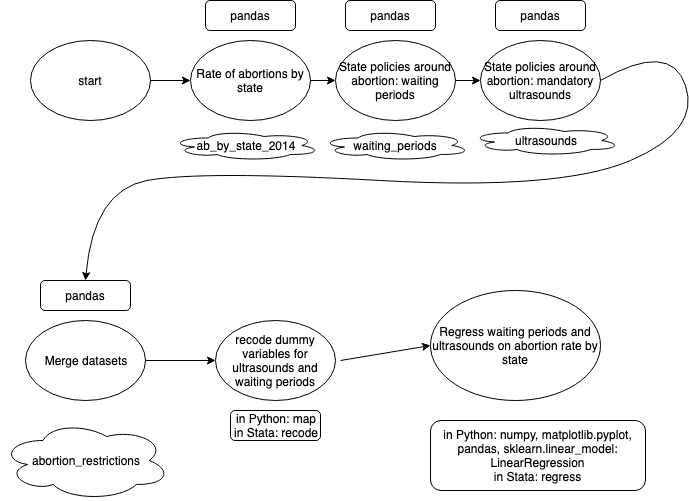

In [0]:
from IPython.display import Image
Image('workflow_diagram.png')

## Gathering data to address research question

### First dataset: abortion rate by state, 2014

My first dataset will be the number of abortions by state as of 2014. This dataset comes from the Guttmacher Institute and can be found here:
https://data.guttmacher.org/states?state=AL+AK+AZ+AR+CA+CO+CT+DE+DC+FL+GA+HI+ID+IL+IN+IA+KS+KY+LA+ME+MD+MA+MI+MN+MS+MO+MT+NE+NV+NH+NJ+NM+NY+NC+ND+OH+OK+OR+PA+RI+SC+SD+TN+TX+UT+VT+VA+WA+WV+WI+WY&topics=65

In [0]:
# the data downloaded as a csv file, so I'll use pandas to read it
import pandas as pd

ab_by_state = pd.read_csv("abortion_rate_by_state_2014.csv")

# I will check the first and last 5 records, and the column values
print("1. Getting the first 5 records")
print(ab_by_state.head(5))

print("2. Retrieving last 5 records")
print(ab_by_state.tail(5))

print("3. Getting column values")
print(ab_by_state.columns)
print(list(ab_by_state))
# U.S. State gives the state full name 
# this will be good for merging later

# I want to drop the last 3 rows, which contain notes 
# they aren't relevant for analysis
print("4. Dropping last 3 rows")
ab_by_state.drop(ab_by_state.tail(3).index,inplace=True)

# I also want to rename the columns
ab_by_state.columns = ['state', 'change_in_rate_2011-2014', 'abortion_rate_2014']

print("4. Checking last ten")
print(ab_by_state.tail(10))




1. Getting the first 5 records
   U.S. State  \
0     Alabama   
1      Alaska   
2     Arizona   
3    Arkansas   
4  California   

  % change in abortion rate (the no. of abortions per 1,000 women aged 15-44), by state of occurrence, 2011-2014  \
0                                                -16                                                               
1                                                -20                                                               
2                                                -22                                                               
3                                                  4                                                               
4                                                -15                                                               

  Abortion rate (the no. of abortions per 1,000 women aged 15-44), by state of occurrence, 2014  
0                                                8.3                   

### Second dataset: mandatory waiting periods

For my second dataset, I will use a dataset on mandatory waiting periods by state. This dataset comes from the Kaiser Family Foundation but uses data from the Guttmacher Institute as of Oct 1, 2018. https://www.kff.org/womens-health-policy/state-indicator/mandatory-waiting-periods/

In [0]:
# the data downloaded as a csv file, so I'll use pandas to read it
import pandas as pd

waiting_periods = pd.read_csv("mandatory_waiting_periods_asof_2018.csv", skiprows=2)

# I will check the first and last 10 records, and the column values
print("1. Getting the first 5 records")
print(waiting_periods.head(5))

print("2. Retrieving last 25 records")
print(waiting_periods.tail(5))

# There are so many rows with notes
# they aren't relevant for analysis
print("3. Dropping last 21 rows with notes")
waiting_periods.drop(waiting_periods.tail(21).index,inplace=True)

# These column names are a mess, so I'll rename
print("4. Getting column values")
print(waiting_periods.columns)
print(list(waiting_periods))

waiting_periods = waiting_periods.drop(waiting_periods.columns[[4]], axis=1)

print("5. Renaming columns")
waiting_periods.columns = ['state', 'waiting_period', 'Length_Waiting_Period', '2_trips_necessary']

print("6. Checking first 5 rows")
print(waiting_periods.head(5))

print ("7. Checking last 5 rows")
print(waiting_periods.tail(5))

1. Getting the first 5 records
        Location Mandatory Waiting Period  \
0  United States           27 States: Yes   
1        Alabama                      Yes   
2         Alaska                       No   
3        Arizona                      Yes   
4       Arkansas                      Yes   

  Length of Waiting Period between Counseling and Procedure  \
0                                                NaN          
1                                           48 hours          
2                                                NaN          
3                                           24 hours          
4                                           48 hours          

  In-Person Counseling Necessitates Two Trips to Clinic Footnotes  
0                                     14 States: Yes          NaN  
1                                                 No            1  
2                                                NaN          NaN  
3                                              

### Third dataset: mandatory ultrasound

For my third dataset, I will import a dataset of mandatory ultrasound policies prior to abortion. This dataset comes from the Kaiser Family Foundation using data from the Guttmacher Institute as of April 1, 2017: https://www.kff.org/womens-health-policy/state-indicator/ultrasound-requirements/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [0]:
import pandas as pd

ultrasounds = pd.read_csv("ultrasound_requirements_asof_2017.csv", skiprows=2)


# I will check the first and last 5 records, and the column values
print("1. Getting the first 5 records")
print(ultrasounds.head(5))

print("2. Retrieving last 5 records")
print(ultrasounds.tail(5))

print("3. Getting column values")
print(ultrasounds.columns)
print(list(ultrasounds))
# 'Location' is the variable I'll need when merging later
# 'Location' gives the full state name.

# There are a lot of rows I don't need in here, so I'll drop some:
# Dropping last 16 rows with duplicated data (see notes above)
ultrasounds.drop(ultrasounds.tail(16).index,inplace=True)

# These column names are a mess, so I'll rename
print("4. Getting column values")
print(ultrasounds.columns)
print(list(ultrasounds))

# A lot of these columns are specifics about the ultrasound policy
# I only want to look at the presence of a policy, so will drop
ultrasounds = ultrasounds.drop(ultrasounds.columns[[2, 3, 4, 5, 6, 7]], axis=1)

print("5. Renaming columns")
ultrasounds.columns = ['state', 'ultrasound_required']

print("6. Retrieving last 10 records")
print(ultrasounds.tail(10))

1. Getting the first 5 records
        Location State has ultrasound requirement?  \
0  United States                            26 Yes   
1        Alabama                               Yes   
2         Alaska                                No   
3        Arizona                               Yes   
4       Arkansas                               Yes   

  Woman must receive information on accessing ultrasound services  \
0                                             14 Yes                
1                                                 No                
2                                                 No                
3                                                 No                
4                                                 No                

  Provision of ultrasound required for abortion and the provider must display and describe image  \
0                                              4 Yes                                               
1                            

## Merging datasets

### Dataset 1 and 2

I'll first merge ab_by_state and waiting_periods

In [0]:
first_two = ab_by_state.merge(waiting_periods, on="state", how="outer")
print("1. Getting the first 10 records")
print(first_two.head(10))

print("2. Retrieving last 10 records")
print(first_two.tail(10))

print("3. Getting column values")
print(first_two.columns)
print(list(first_two))

1. Getting the first 10 records
                  state change_in_rate_2011-2014 abortion_rate_2014  \
0               Alabama                      -16                8.3   
1                Alaska                      -20                 10   
2               Arizona                      -22                9.8   
3              Arkansas                        4                  8   
4            California                      -15               19.5   
5              Colorado                      -14               12.1   
6           Connecticut                      -10               19.2   
7              Delaware                      -41               16.7   
8  District of Columbia                       15               32.7   
9               Florida                      -13               20.6   

                   waiting_period Length_Waiting_Period 2_trips_necessary  
0                             Yes              48 hours                No  
1                              No 

### Adding dataset 3

Now, I'll add the ultrasounds dataset to the merged datasets

In [0]:
abortion_restrictions = first_two.merge(ultrasounds, on="state", how="outer")
print("1. Getting the first 10 records")
print(abortion_restrictions.head(10))

print("2. Retrieving last 10 records")
print(abortion_restrictions.tail(10))

print("3. Getting column values")
print(abortion_restrictions.columns)
print(list(abortion_restrictions))

1. Getting the first 10 records
                  state change_in_rate_2011-2014 abortion_rate_2014  \
0               Alabama                      -16                8.3   
1                Alaska                      -20                 10   
2               Arizona                      -22                9.8   
3              Arkansas                        4                  8   
4            California                      -15               19.5   
5              Colorado                      -14               12.1   
6           Connecticut                      -10               19.2   
7              Delaware                      -41               16.7   
8  District of Columbia                       15               32.7   
9               Florida                      -13               20.6   

                   waiting_period Length_Waiting_Period 2_trips_necessary  \
0                             Yes              48 hours                No   
1                              N

In [0]:
# I want to remove the US aggregated row
abortion_restrictions.drop(abortion_restrictions.tail(1).index,inplace=True)

print(abortion_restrictions.tail(10))


             state change_in_rate_2011-2014 abortion_rate_2014  \
39    Rhode Island                      -14                 17   
40  South Carolina                      -10                6.4   
41    South Dakota                      -11                3.5   
42       Tennessee                      -18               10.7   
43           Texas                      -28                9.8   
44            Utah                      -14                4.6   
45         Vermont                        3               12.1   
46        Virginia                      -23               12.5   
47      Washington                      -14               13.7   
48   West Virginia                      -14                  6   

    waiting_period Length_Waiting_Period 2_trips_necessary  \
39             0.0                   NaN               NaN   
40             1.0              24 hours                No   
41             1.0              72 hours               Yes   
42             1.0       

## Exporting final merged dataset

In [0]:
abortion_restrictions.to_csv("abortion_restrictions.csv")

## Analysis

### Recoding to dummy variables

In [0]:
# Recoding to dummy variables
abortion_restrictions['waiting_period'] = abortion_restrictions['waiting_period'].map({'No':0, 'Yes':1}) 
abortion_restrictions['ultrasound_required'] = abortion_restrictions['ultrasound_required'].map({'No':0, 'Yes':1}) 

print(abortion_restrictions.tail(10))

            state change_in_rate_2011-2014 abortion_rate_2014  waiting_period  \
41   South Dakota                      -11                3.5             1.0   
42      Tennessee                      -18               10.7             1.0   
43          Texas                      -28                9.8             1.0   
44           Utah                      -14                4.6             1.0   
45        Vermont                        3               12.1             0.0   
46       Virginia                      -23               12.5             1.0   
47     Washington                      -14               13.7             0.0   
48  West Virginia                      -14                  6             1.0   
49      Wisconsin                      -21                5.6             1.0   
50        Wyoming                       -4                1.1             0.0   

   Length_Waiting_Period 2_trips_necessary  ultrasound_required  
41              72 hours               Yes

In [0]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### Regression on ultrasounds

   Unnamed: 0       state  abortion_rate_2014  waiting_period  \
0           0     Alabama                 8.3               1   
1           1      Alaska                10.0               0   
2           2     Arizona                 9.8               1   
3           3    Arkansas                 8.0               1   
4           4  California                19.5               0   

   ultrasound_required  
0                    1  
1                    0  
2                    1  
3                    1  
4                    0  
Mandatory ultrasounds on abortion rate


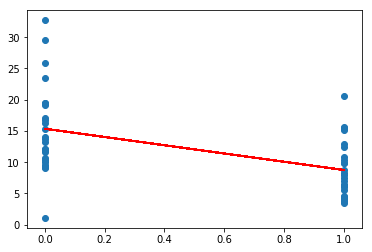

In [0]:
# Load dataset
abortion_restrictions_2 = pd.read_csv('abortion_restrictions.csv') 
abortion_restrictions_2 = abortion_restrictions_2.drop(abortion_restrictions_2.columns[[2, 5, 6]], axis=1)

# Recode to dummy variables
abortion_restrictions_2['waiting_period'] = abortion_restrictions_2['waiting_period'].map({'No':0, 'Yes':1, 'Enjoined; policy not in effect':0, 'Policy temporarily enjoined; policy not in effect':0}) 
abortion_restrictions_2['ultrasound_required'] = abortion_restrictions_2['ultrasound_required'].map({'No':0, 'Yes':1}) 

# Test to make sure it worked
print(abortion_restrictions_2.head(5))

# Regression of abortion rate on mandatory ultrasounds
X = abortion_restrictions_2.loc[:, ['ultrasound_required']].values 
Y = abortion_restrictions_2['abortion_rate_2014'].values
# create object
linear_regressor = LinearRegression()  
# Perform linear regression
linear_regressor.fit(X, Y) 
# Make predictions
Y_pred = linear_regressor.predict(X)  

print("Mandatory ultrasounds on abortion rate")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


### Regression on waiting periods

   Unnamed: 0       state  abortion_rate_2014  waiting_period  \
0           0     Alabama                 8.3               1   
1           1      Alaska                10.0               0   
2           2     Arizona                 9.8               1   
3           3    Arkansas                 8.0               1   
4           4  California                19.5               0   

   ultrasound_required  
0                    1  
1                    0  
2                    1  
3                    1  
4                    0  
Scatter plot: mandatory waiting period on abortionrate


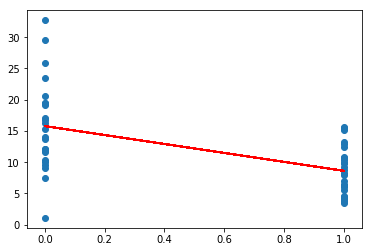

In [0]:
# Test to make sure data are still there
print(abortion_restrictions_2.head(5))

# Regression
X = abortion_restrictions_2.loc[:, ['waiting_period']].values
Y = abortion_restrictions_2['abortion_rate_2014'].values
# create object
linear_regressor = LinearRegression()  
# Perform linear regression
linear_regressor.fit(X, Y) 
# Make predictions
Y_pred = linear_regressor.predict(X)  

print("Scatter plot: mandatory waiting period on abortionrate")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show() 

### Switching to stata for multiple regression

The graphs here show that both mandatory ultrasounds and mandatory waiting periods are negatively correlated with the abortion rate. I'll pull all this into Stata for further analysis, in order to do a multiple regression.

In Stata, I found that the coefficient for waiting periods is -6.82 and it is significant at p<.05.

I also added in the change in the abortion rate, from 2011-2014, to the regression model. The change was positively correlated but not extremely significant (p=0.09).

If I were investigating this research question, I would go a different direction based on this analysis: I would create an index of abortion restrictions (waiting periods, ultrasounds, but also any other restrictions such as restrictions on providers and other restrictions on access) and give states a score. I would then see if states with a higher score on the index of abortion restrictions were associated with lower abortion rates.